C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Pr

        Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0  0.271174  0.014151           0         1           0           0   
1  0.472229  0.139136           1         0           1           0   
2  0.321438  0.015469           1         0           0           0   
3  0.434531  0.103644           1         0           0           0   
4  0.434531  0.015713           0         1           0           0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  ...  SibSp_4  SibSp_5  SibSp_8  \
0           1         0         0         1  ...        0        0        0   
1           0         1         0         0  ...        0        0        0   
2           1         0         0         1  ...        0        0        0   
3           1         1         0         0  ...        0        0        0   
4           1         0         0         1  ...        0        0        0   

   Parch_0  Parch_1  Parch_2  Parch_3  Parch_4  Parch_5  Parch_6  
0        1        0        0   

14/14 [==============================] - 0s 3ms/step - loss: 0.5181 - acc: 0.7627 - val_loss: 0.4684 - val_acc: 0.7989
Epoch 23/25
14/14 [==============================] - 0s 3ms/step - loss: 0.5132 - acc: 0.7681 - val_loss: 0.4682 - val_acc: 0.7989
Epoch 24/25
14/14 [==============================] - 0s 3ms/step - loss: 0.5144 - acc: 0.7678 - val_loss: 0.4681 - val_acc: 0.7989
Epoch 25/25
891/891 [==============================] - 0s 13us/sample - loss: 0.4641 - acc: 0.8058
Accuracy on test set: 0.464


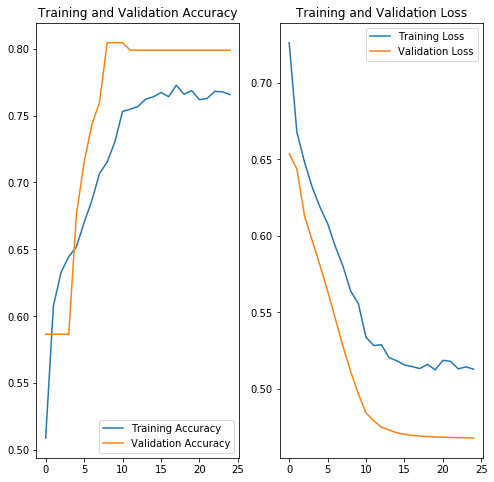

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Import our training data and clean it up
training_file = pd.read_csv('../data/train.csv', encoding='utf-8')
testing_file = pd.read_csv('../data/test.csv', encoding='utf-8')

#Let's drop some columns we don't need
training_file = training_file.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
testing_file = testing_file.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

#And assign whether they survived or not to our label
label = training_file[['Survived']]
label = label.values
training_file = training_file.drop(['Survived'], axis=1)

#Split files into continous and categorial dataframes
train_num = training_file.select_dtypes(exclude=['object'])
train_cat = training_file.select_dtypes(include=['object'])
test_num = testing_file.select_dtypes(exclude=['object'])
test_cat = testing_file.select_dtypes(include=['object'])

#Some age data is missing, lets fill it with the average age
average_age = int(train_num['Age'].mean())
train_num = train_num.fillna({'Age': average_age})
test_num = test_num.fillna({'Age': average_age})

#Fill remaining missing data with something
train_num.fillna(0, inplace=True)
train_cat.fillna('NONE', inplace=True)
test_num.fillna(0, inplace=True)
test_cat.fillna('NONE', inplace=True)

#Pclass, SibSp and Parch seem to be categorial, lets move them
train_cat['Pclass'] = train_num['Pclass'].astype(object)
train_num = train_num.drop(['Pclass'], axis=1)
train_cat['SibSp'] = train_num['SibSp'].astype(object)
train_num = train_num.drop(['SibSp'], axis=1)
train_cat['Parch'] = train_num['Parch'].astype(object)
train_num = train_num.drop(['Parch'], axis=1)

test_cat['Pclass'] = test_num['Pclass'].astype(object)
test_num = test_num.drop(['Pclass'], axis=1)
test_cat['SibSp'] = test_num['SibSp'].astype(object)
test_num = test_num.drop(['SibSp'], axis=1)
test_cat['Parch'] = test_num['Parch'].astype(object)
test_num = test_num.drop(['Parch'], axis=1)

#Convert categorical data to one-hot
train_cat = pd.get_dummies(train_cat, dummy_na=False, sparse=True)
test_cat = pd.get_dummies(test_cat, dummy_na=False, sparse=True)

#Normalise our continous data
train_num_cols = list(train_num.columns)
test_num_cols = list(test_num.columns)
x = train_num.values
z = test_num.values
minmax_scaler = MinMaxScaler()
x_scaled = minmax_scaler.fit_transform(x)
z_scaled = minmax_scaler.fit_transform(z)
train_num = pd.DataFrame(x_scaled, columns=train_num_cols)
test_num = pd.DataFrame(z_scaled, columns=test_num_cols)

#Merge it all back together, continous and categorical
dataset = pd.merge(train_num, train_cat, left_index=True, right_index=True)
testdata = pd.merge(test_num, test_cat, left_index=True, right_index=True)

#Remove a couple of additional columns.
testdata = testdata.drop(['Parch_9'], axis=1)
dataset = dataset.drop(['Embarked_NONE'], axis=1)

#Let's look at our final data all cleaned up
print(dataset.head())
print(testdata.head())

#Now lets split out training data into train and validation sets
dataset = dataset.values
x_train, x_val, y_train, y_val = train_test_split(dataset, label, test_size=0.2, random_state=42)
label_size = y_train.shape[1]

print(x_train.shape)

#Build our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(40, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

optimiser = tf.keras.optimizers.Adam(0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimiser,
              metrics=['accuracy'])

model.summary()
print(x_train.shape)
print(x_train)

#Learning reduction callback function
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                                    patience=2, 
                                                    verbose=1, 
                                                    factor=0.5, 
                                                    min_lr=0.00001)

#Train model
BATCH_SIZE = 50
EPOCHS = 25
history = model.fit(x_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
                    validation_data=(x_val,y_val),
                    callbacks=[lr_reduction])

#Evaluate model against test data
acc_result, _ = model.evaluate(dataset, label)
print('Accuracy on test set: {}'.format(round(acc_result, 3)))

#Visualise our results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./training-data.png')
plt.show()

#Make predictions against test data and save
testdata = testdata.values
test_predictions = model.predict(testdata)

test_predictions = np.argmax(test_predictions, axis=1)

print(test_predictions)



In [4]:
X_tmp =  pd.read_csv('../data/test.csv')
X_tmp['Survived'] = test_predictions
sub = X_tmp[['PassengerId', 'Survived']]
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
sub.to_csv('submissionKeras.csv', index = False)